<a href="https://colab.research.google.com/github/EwaSzyszka/123/blob/master/Solutions_to_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Initializing the state to be teleported to: $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ 

In [1]:
#STEP 1: Initializing the state to be teleported. We will do this on Alice's qubit q0

def initialize_qubit(given_circuit, qubit_index):


    ### ___________________________new code ___________________________
    from math import sqrt
    import numpy as np
        
    initial_state = [sqrt(0.70), sqrt(0.30)] #This is where the state is written
    given_circuit.initialize(initial_state, qubit_index)    
 
    ### ___________________________ new code ___________________________
    
    return given_circuit

STEP 2: Entanglement

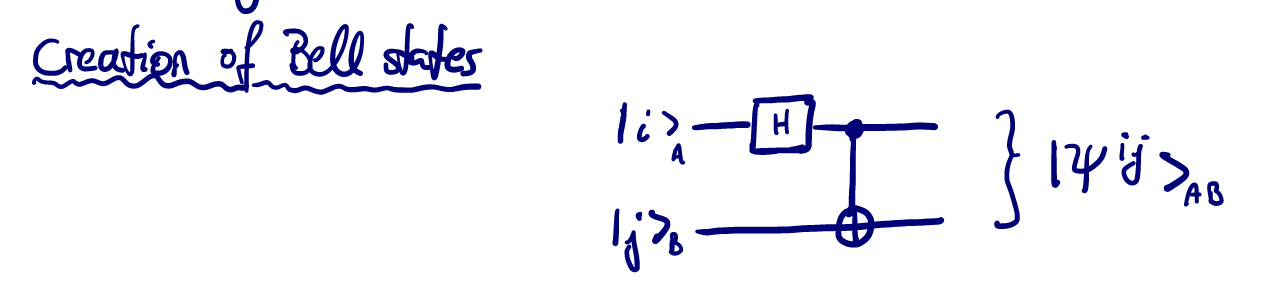

In [2]:
#STEP 2: Creating entanglement between two qubits. We will use qubits q1 and q2 for this. Recall that Alice owns q1, and Bob owns q2.

def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    
    ### ___________________________new code ___________________________
    
    given_circuit.h(qubit_Alice) #This is where Hadamard gate is applied
    given_circuit.cx(qubit_Alice, qubit_Bob) #This is where CNOT gate is applied    

    ### ___________________________new code ___________________________
    
    return given_circuit

STEP 3: Bell measurement

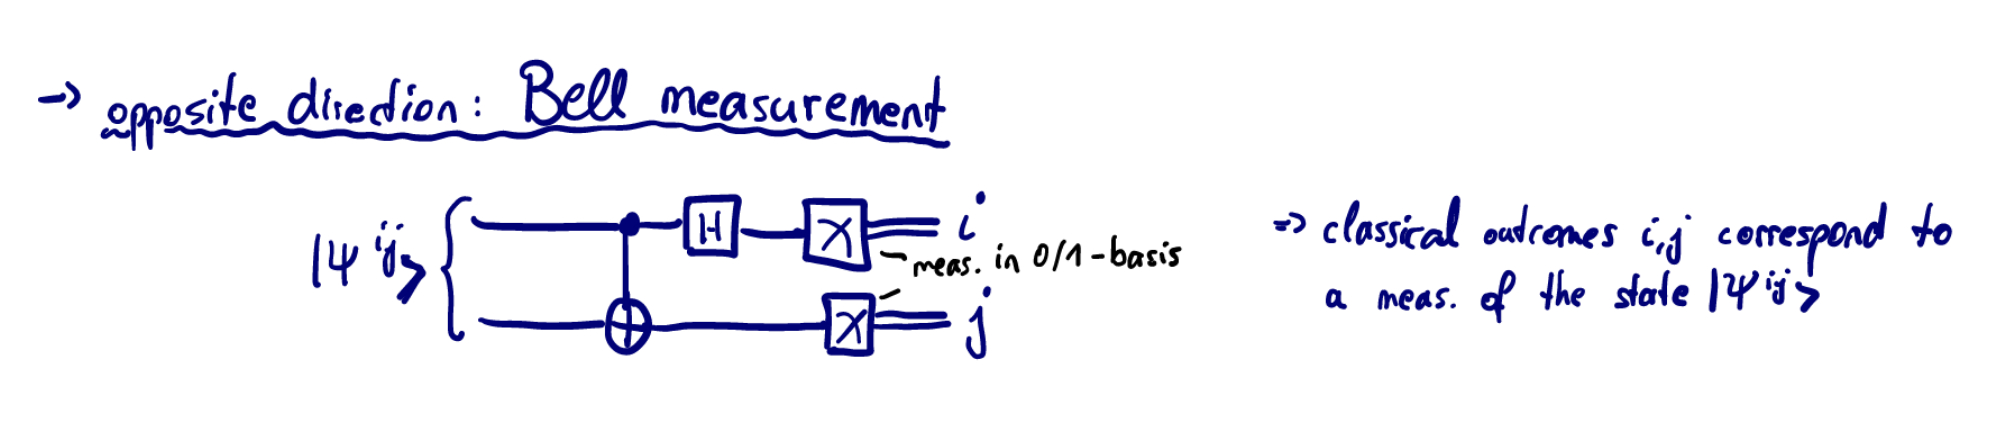

In [3]:
#STEP 3: Applying a Bell measurement on Alice's qubits q0 and q1.

def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):
    
    ### ___________________________new code ___________________________

    given_circuit.cx(qubit1_Alice, qubit2_Alice)
    given_circuit.h(qubit1_Alice)
    given_circuit.barrier() #The measurement is separated by a barrier (it impacts only visual display, not part of the circuit)
    given_circuit.measure(qubit1_Alice, clbit1_Alice)
    given_circuit.barrier() #The measurement is separated by a barrier (it impacts only visual display, not part of the circuit)
    given_circuit.measure(qubit2_Alice, clbit2_Alice)

    ### ___________________________new code ___________________________

    return given_circuit

STEP 4: Conditional gates

if Alice's 1st classical bit == 1 --> apply Z gate on Bob 

---


if Alice's 2nd classical bit == 1 --> apply X gate on Bob

In [4]:
#STEP 4: Applying classically controlled operations on Bob's qubit q2 depending on the outcomes of the Bell measurement on Alice's qubits

def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    
    #Final approach 
    given_circuit.x(qubit_Bob).c_if(clbit2_Alice, 1) #I use c_if, as this is the qiskit way of doing if statements on classical bits
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice, 1) 

    #This approach will not work 
    '''
    if clbit2_Alice == 1:
      given_circuit.x(qubit_Bob)
    if clbit1_Alice == 1:
      given_circuit.z(qubit_Bob)    
    '''
    #Next approach:
    '''
    if given_circuit.measure(qubit1_Alice, clbit1_Alice) == 1:
      given_circuit.x(qubit_Bob)
    if given_circuit.measure(qubit2_Alice, clbit2_Alice) == 1:
      given_circuit.z(qubit_Bob)
    '''
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

In [ ]:
!pip install qiskit

In [ ]:
!pip install pylatexenc
!pip install ipywidgets
!pip install seaborn

In [5]:
### imports
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()
# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()
# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

### Look at the complete circuit
mycircuit.draw()

┌─────────────────────────────┐ ░            ░      ┌───┐ ░ ┌─┐ ░     ░ »
q0_0: ┤ initialize(0.83666,0.54772) ├─░────────────░───■──┤ H ├─░─┤M├─░─────░─»
      └─────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘ ░ ┌─┐ ░ »
q0_1: ────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫──░─┤M├─░─»
                                      ░ └───┘┌─┴─┐ ░ └───┘      ░  ║  ░ └╥┘ ░ »
q1_0: ────────────────────────────────░──────┤ X ├─░────────────░──╫──░──╫──░─»
                                      ░      └───┘ ░            ░  ║  ░  ║  ░ »
c0: 1/═════════════════════════════════════════════════════════════╩═════╬════»
                                                                   0     ║    »
c1: 1/═══════════════════════════════════════════════════════════════════╩════»
                                                                         0    »
«                    
«q0_0: ──────────────
«                    
«q0_1: ──────────────
«       ┌───┐  ┌───┐ 
«q1_0: ─┤ X ├──┤ Z ├─
«       └─┬─┘  └─┬─┘ 
«         │   ┌──┴──┐
«c0: 1/═══╪═══╡ = 1 ╞
«      ┌──┴──┐└─────┘
«c1: 1/╡ = 1 ╞═══════
«      └─────┘

### Ungraded exercise 1

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle + \vert10\rangle\right)$$ 

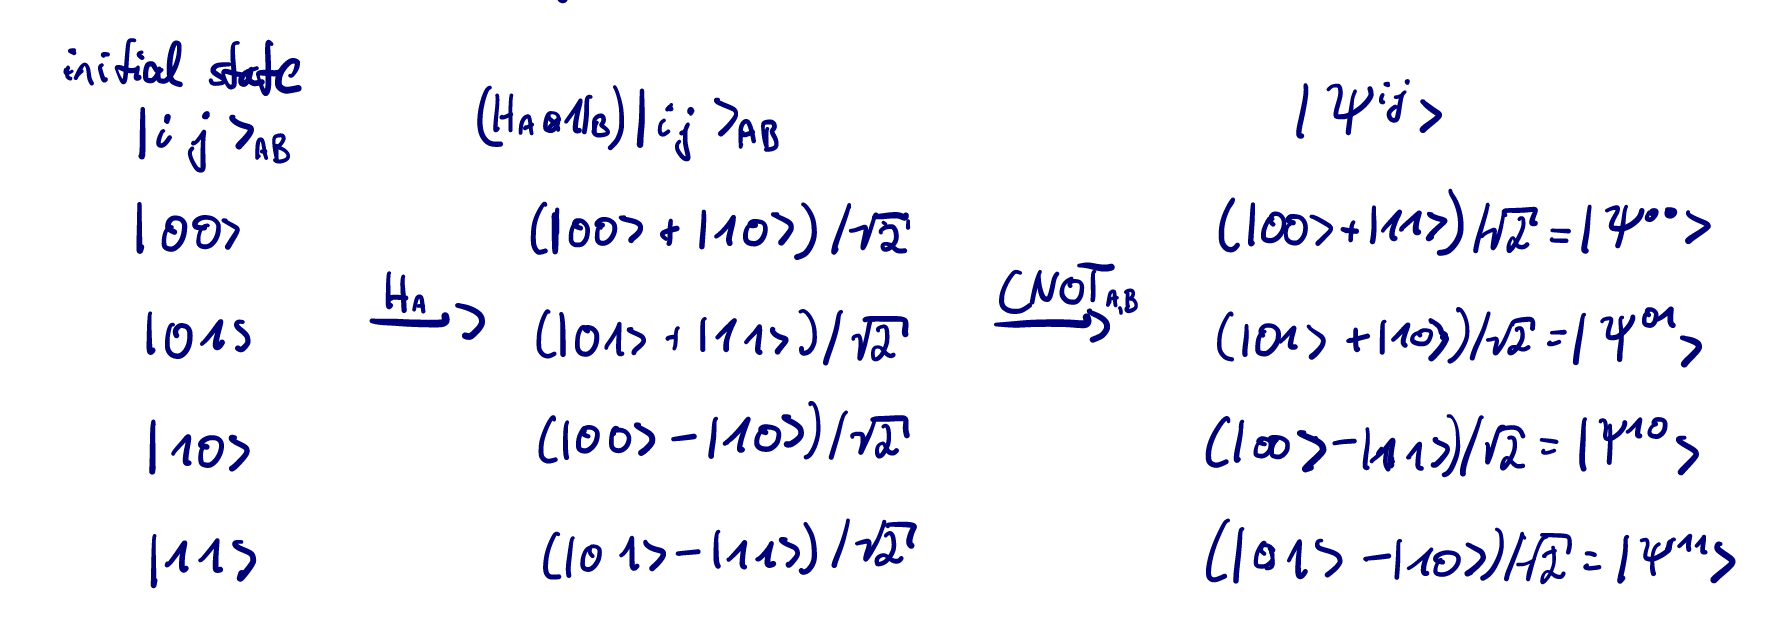

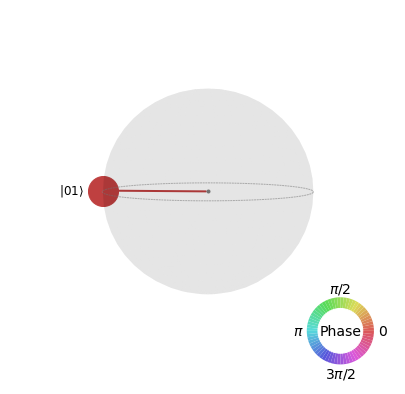

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

sv = Statevector.from_label('01')
plot_state_qsphere(sv.data)

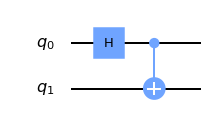

In [8]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


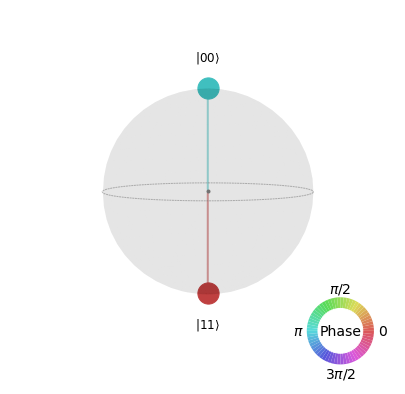

In [9]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)

### Ungraded exercise 2

Can you create the state $$\frac{1}{\sqrt{2}}\left(\vert01\rangle - \vert10\rangle\right)$$ 

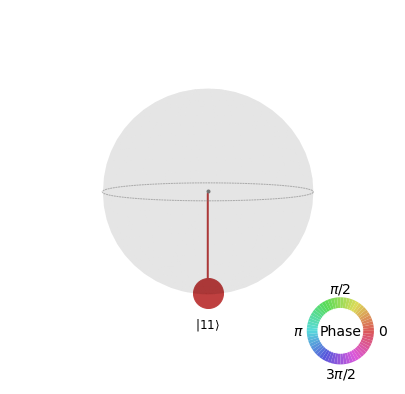

In [10]:
sv = Statevector.from_label('11')
plot_state_qsphere(sv.data)

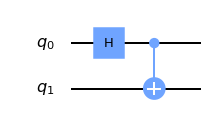

In [11]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw('mpl')

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


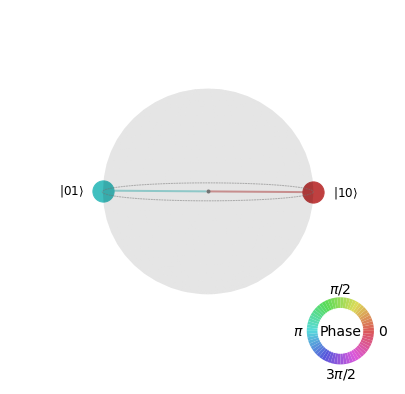

In [12]:
new_sv = sv.evolve(mycircuit)
print(new_sv)
plot_state_qsphere(new_sv.data)